Implement a deep neural network with at least three layers.They network should be pre-trained using denoising auto encoders and back propagation should be used inthe end to fine-tune the neural network. Use the MNIST dataset from Homework#3 to evaluate the performance of the network.

reference - https://medium.com/@connectwithghosh/denoising-images-using-an-autoencoder-using-tensorflow-in-python-1e2e62932837

In [ ]:
#Rishab Verma 4/7/2020

In [59]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
X_train = mnist.train.images
X_test = mnist.test.images

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [60]:
import matplotlib.pyplot as plt
from numpy import loadtxt
import numpy as np
from pylab import rcParams

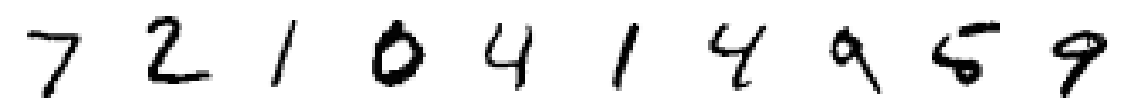

In [61]:
#for visual purpose of test images
rcParams['figure.figsize'] = 20,20
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(28,28),  cmap='Greys')
    plt.axis('off')
plt.show()

In [62]:
#create noise matrix 
n_rows = X_test.shape[0]
n_cols = X_test.shape[1]
mean = 0.5
stddev = 0.3
noise = np.random.normal(mean, stddev, (n_rows, n_cols))
X_test_noisy = X_test + noise


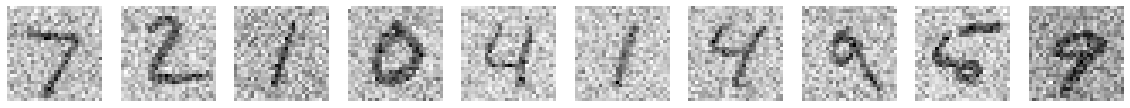

In [63]:
#for visual purpose of noise images
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test_noisy[i].reshape(28,28),  cmap='Greys')
    plt.axis('off')
plt.show()

In [64]:
#creat 1 hidden layers - 1 input layer - 1 output layer -   
n_nodes_inpl = 784  #encoder
n_nodes_hl1  = 32  #encoder
n_nodes_hl2  = 32  #decoder
n_nodes_hl3  = 32  #decoder
n_nodes_outl = 784  #decoder

hidden_1_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_inpl,n_nodes_hl1])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))  }
hidden_2_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))  }
hidden_3_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))  }
output_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_nodes_outl])),
 'biases':tf.Variable(tf.random_normal([n_nodes_outl])) }



In [65]:
#add bias and weight to each layer layer
input_layer = tf.placeholder('float', [None, 784])
layer_1 = tf.nn.sigmoid(
       tf.add(tf.matmul(input_layer,hidden_1_layer_vals['weights']),
       hidden_1_layer_vals['biases']))
layer_2 = tf.nn.sigmoid(
       tf.add(tf.matmul(layer_1,hidden_2_layer_vals['weights']),
       hidden_2_layer_vals['biases']))
layer_3 = tf.nn.sigmoid(
       tf.add(tf.matmul(layer_2,hidden_3_layer_vals['weights']),
       hidden_3_layer_vals['biases']))
output_layer = tf.matmul(layer_3,output_layer_vals['weights']) +output_layer_vals['biases']

In [66]:
#error calcuation 
output_true = tf.placeholder('float', [None, 784])

In [67]:
#cost and optimizer
meansq =    tf.reduce_mean(tf.square(output_layer - output_true))
learn_rate = 0.1  
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

In [71]:
 #train models
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 100  
hm_epochs =1000   
tot_images = X_train.shape[0] 
for epoch in range(1000): # otherwise set to hm_epochs
    epoch_loss = 0    # initializing error as 0
    for i in range(int(tot_images/batch_size)):
        epoch_x = X_train[ i*batch_size : (i+1)*batch_size ]
        _, c = sess.run([optimizer, meansq],\
               feed_dict={input_layer: epoch_x, \
               output_true: epoch_x})
        epoch_loss += c
        prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(output_true, 1))
        accuracy = tf.reduce_mean(tf.cast(prediction, "float"))  
        print(1 - (accuracy.eval({x: mnist.train.images, y: mnist.train.labels}))
#test_score = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})    
    print('Epoch', epoch, '/', hm_epochs, 'loss:',epoch_loss)



Epoch 0 / 1000 loss: 682.8721096217632
Epoch 1 / 1000 loss: 139.29939548671246
Epoch 2 / 1000 loss: 57.87504156678915
Epoch 3 / 1000 loss: 42.30081508308649
Epoch 4 / 1000 loss: 38.978171821683645
Epoch 5 / 1000 loss: 38.08738820999861
Epoch 6 / 1000 loss: 37.74737725034356
Epoch 7 / 1000 loss: 37.56735062971711
Epoch 8 / 1000 loss: 37.451857671141624
Epoch 9 / 1000 loss: 37.37045896053314
Epoch 10 / 1000 loss: 37.31008790805936
Epoch 11 / 1000 loss: 37.26377276703715
Epoch 12 / 1000 loss: 37.22730892896652
Epoch 13 / 1000 loss: 37.19798440113664
Epoch 14 / 1000 loss: 37.17397392913699
Epoch 15 / 1000 loss: 37.15400716662407
Epoch 16 / 1000 loss: 37.13717805594206
Epoch 17 / 1000 loss: 37.122825019061565
Epoch 18 / 1000 loss: 37.11045482009649
Epoch 19 / 1000 loss: 37.09969452023506
Epoch 20 / 1000 loss: 37.09025562927127
Epoch 21 / 1000 loss: 37.08191442862153
Epoch 22 / 1000 loss: 37.07449273392558
Epoch 23 / 1000 loss: 37.06784796342254
Epoch 24 / 1000 loss: 37.06186544895172
Epoch 

Epoch 202 / 1000 loss: 36.92350784316659
Epoch 203 / 1000 loss: 36.92314292490482
Epoch 204 / 1000 loss: 36.9227774143219
Epoch 205 / 1000 loss: 36.92241109162569
Epoch 206 / 1000 loss: 36.92204426601529
Epoch 207 / 1000 loss: 36.921676605939865
Epoch 208 / 1000 loss: 36.92130821570754
Epoch 209 / 1000 loss: 36.92093921452761
Epoch 210 / 1000 loss: 36.92056944593787
Epoch 211 / 1000 loss: 36.920198660343885
Epoch 212 / 1000 loss: 36.91982750967145
Epoch 213 / 1000 loss: 36.91945560276508
Epoch 214 / 1000 loss: 36.919082663953304
Epoch 215 / 1000 loss: 36.918709103018045
Epoch 216 / 1000 loss: 36.918334510177374
Epoch 217 / 1000 loss: 36.917958963662386
Epoch 218 / 1000 loss: 36.91758280992508
Epoch 219 / 1000 loss: 36.91720587387681
Epoch 220 / 1000 loss: 36.916828032583
Epoch 221 / 1000 loss: 36.91644923388958
Epoch 222 / 1000 loss: 36.91606962680817
Epoch 223 / 1000 loss: 36.915689285844564
Epoch 224 / 1000 loss: 36.91530783101916
Epoch 225 / 1000 loss: 36.91492558643222
Epoch 226 / 

Epoch 401 / 1000 loss: 36.827039670199156
Epoch 402 / 1000 loss: 36.82636882737279
Epoch 403 / 1000 loss: 36.825695402920246
Epoch 404 / 1000 loss: 36.82501934841275
Epoch 405 / 1000 loss: 36.8243404738605
Epoch 406 / 1000 loss: 36.82365868613124
Epoch 407 / 1000 loss: 36.822974376380444
Epoch 408 / 1000 loss: 36.82228734344244
Epoch 409 / 1000 loss: 36.82159727066755
Epoch 410 / 1000 loss: 36.82090451195836
Epoch 411 / 1000 loss: 36.82020881399512
Epoch 412 / 1000 loss: 36.81951070204377
Epoch 413 / 1000 loss: 36.81880946829915
Epoch 414 / 1000 loss: 36.818105198442936
Epoch 415 / 1000 loss: 36.81739845126867
Epoch 416 / 1000 loss: 36.81668848544359
Epoch 417 / 1000 loss: 36.81597574427724
Epoch 418 / 1000 loss: 36.815260250121355
Epoch 419 / 1000 loss: 36.814541425555944
Epoch 420 / 1000 loss: 36.81381989642978
Epoch 421 / 1000 loss: 36.8130953386426
Epoch 422 / 1000 loss: 36.812367629259825
Epoch 423 / 1000 loss: 36.811636947095394
Epoch 424 / 1000 loss: 36.81090332567692
Epoch 425 

Epoch 600 / 1000 loss: 36.621276292949915
Epoch 601 / 1000 loss: 36.61980875954032
Epoch 602 / 1000 loss: 36.61833615228534
Epoch 603 / 1000 loss: 36.61685813963413
Epoch 604 / 1000 loss: 36.61537507176399
Epoch 605 / 1000 loss: 36.61388698592782
Epoch 606 / 1000 loss: 36.61239367723465
Epoch 607 / 1000 loss: 36.61089522764087
Epoch 608 / 1000 loss: 36.60939161106944
Epoch 609 / 1000 loss: 36.60788279026747
Epoch 610 / 1000 loss: 36.60636892169714
Epoch 611 / 1000 loss: 36.6048495285213
Epoch 612 / 1000 loss: 36.60332515463233
Epoch 613 / 1000 loss: 36.60179553180933
Epoch 614 / 1000 loss: 36.60026067867875
Epoch 615 / 1000 loss: 36.59872046113014
Epoch 616 / 1000 loss: 36.59717508032918
Epoch 617 / 1000 loss: 36.59562428295612
Epoch 618 / 1000 loss: 36.594068475067616
Epoch 619 / 1000 loss: 36.5925072953105
Epoch 620 / 1000 loss: 36.59094077721238
Epoch 621 / 1000 loss: 36.58936895802617
Epoch 622 / 1000 loss: 36.587791826575994
Epoch 623 / 1000 loss: 36.58620936051011
Epoch 624 / 100

Epoch 800 / 1000 loss: 36.20943542197347
Epoch 801 / 1000 loss: 36.206692546606064
Epoch 802 / 1000 loss: 36.20394216477871
Epoch 803 / 1000 loss: 36.20118425041437
Epoch 804 / 1000 loss: 36.19841866195202
Epoch 805 / 1000 loss: 36.195645559579134
Epoch 806 / 1000 loss: 36.19286496564746
Epoch 807 / 1000 loss: 36.19007684662938
Epoch 808 / 1000 loss: 36.187281135469675
Epoch 809 / 1000 loss: 36.18447766453028
Epoch 810 / 1000 loss: 36.181666653603315
Epoch 811 / 1000 loss: 36.17884807661176
Epoch 812 / 1000 loss: 36.176022078841925
Epoch 813 / 1000 loss: 36.17318805679679
Epoch 814 / 1000 loss: 36.17034676671028
Epoch 815 / 1000 loss: 36.16749768331647
Epoch 816 / 1000 loss: 36.16464127227664
Epoch 817 / 1000 loss: 36.16177685931325
Epoch 818 / 1000 loss: 36.15890522673726
Epoch 819 / 1000 loss: 36.15602606162429
Epoch 820 / 1000 loss: 36.1531391851604
Epoch 821 / 1000 loss: 36.15024450421333
Epoch 822 / 1000 loss: 36.14734239131212
Epoch 823 / 1000 loss: 36.14443260803819
Epoch 824 / 

Epoch 999 / 1000 loss: 35.516212463378906


In [ ]:
#back prop
def backward(self, X, y, o):
    # backward propgate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
